<a href="https://www.kaggle.com/code/nawallu/google-data-analytics-case-study-1-bikeshare?scriptVersionId=140241682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Capstone Project: Google Data Analytics: 
### Case Study 1: How does a bike-share navigate speedy success

In this notebook, I will share my analysis process which is based on the six data analysis phases or the APPASA framework, also known as Ask, Prepare, Process, Analyze, Share, and Act.

First, we start by giving a little bit of context which can be found thoroughly explained here [Case Study 1](https://d3c33hcgiwev3.cloudfront.net/aacF81H_TsWnBfNR_x7FIg_36299b28fa0c4a5aba836111daad12f1_DAC8-Case-Study-1.pdf?Expires=1689379200&Signature=R0v1LO-A6qhfum4-ZhvoRsnzAitqIRKvT33IpX89ErYFhSalYlD8EaLJoDl6e6bo-mRUCiq3OAH~~6RGl8Ol8ZaS~kYoB8XnfdzHnNrjxNZPEfU8GlDnJfaSNZKMWUtCDOdX581-0AIn9TY9hxB4oeyXy06Sh9JKAV-Z2fQ42Ig_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A)  

Cylistic is a fictional bike-sharing company that believes its success in increasing annual sales profit depends highly on increasing the number of annual membership subscription. Hence, to achieve that, the marketing team is interested in understanding the different ways the casual (members purchasing single-ride passes or full-day passes) and annual members (members own annual subscriptions) use the company's services. Then, use that knowledge to convert casual members into annual subscribers.

<br>

***

# **1. Ask**
In the ask phase, here is a set of questions we need to answer:

**Main project questions**

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members

**Additional questions**

4. Who are the main key stakeholders?
5. What source(s) of data do we have to solve the problem?


**Business Task:** Find and analyze differences between the casual and annual riders to convert causal members into annual subscribers and increase company profit

Also, the main stakeholders are the marketing manager and the executive team since they are highly interested in the outcome of this project

<br>

***

# **2. Prepare**
The data that we have is an open source data that can be used, shared, and reproduced. It is also important to note that the privacy of the riders is protected by not sharing any personal inforamtion related to them and we are using the data as permitted to analyze and gain insights.  

> the used data is in a twelve months timeframe, from *June 2022 until May 2023*. 

In addition, the data is stored in a local folder and processed using R as a single dataset using the rbind function to combine the twelve datasets into one dataset. It is important to note that the sum of rows across the twelve datasets is **5829040**  

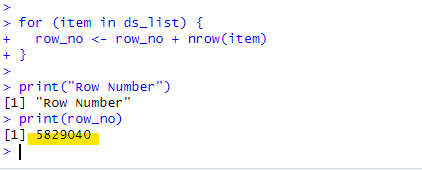
<br>




In [1]:
library(tidyverse)
main_df <- read_csv("../input/d/nawallu/bikeshare-tripdata-202206-202305/main_df.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `` -> `...1`
Rows: 5829040 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (5): ...1, start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
nrow(main_df)

[1] 5829040

*** 

# **3. Process**

The used tool is R because the used data is large with over five million rows. Also, I am using a Kaggle notebook to document the cleaning process. Additionally, we will ensure going through the cleaning process and efficiently documenting it by checking this checklist:

**Ensure Data Integrity**
* Check & delete null values
* Check & delete duplicates
* Ensure data types across columns are consistent
* Ensure date format is consistent 

> **Data integrity** is the accuracy, completeness, consistency, and trustworthiness of data throughout its lifecycle. 

**Prepare for Analysis**
* Sort data by date column
* Calculate the time for each ride
* Calculate and record the day of the week for each ride
* Last check: Ensure data is valid for analysis 


### Check & delete null values

In [3]:
main_df <- main_df %>% drop_na()
nrow(main_df)

[1] 4494681

### Check & delete duplicates

In [4]:
no_duplicates <- main_df[!duplicated(main_df$ride_id), ]
paste(nrow(no_duplicates), "rows. Removed", nrow(main_df) - nrow(no_duplicates), "duplicates")

main_df <- main_df[!duplicated(main_df$ride_id), ]

[1] "4494681 rows. Removed 0 duplicates"

### Ensure data types across columns are consistent


In [5]:
head(main_df, 5)

...1,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<dbl>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
99,B12AD6565494C368,classic_bike,2022-06-09 22:28:32,2022-06-09 22:52:17,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.92269,-87.69715,41.92269,-87.69715,casual
138,BAD4CB075003A605,electric_bike,2022-06-19 17:08:23,2022-06-19 17:08:25,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.92261,-87.69715,41.92269,-87.69715,casual
215,76DAD9FC95774B53,electric_bike,2022-06-26 23:59:44,2022-06-27 00:25:26,Burnham Greenway & 105th St,20222,Burnham Greenway & 105th St,20222,41.70463,-87.52841,41.70458,-87.52823,casual
217,47DE68ACCA138C13,electric_bike,2022-06-27 11:40:53,2022-06-27 11:50:16,Wood St & Chicago Ave,637,California Ave & Division St,13256,41.89561,-87.67210,41.90303,-87.69747,casual
234,5D899636D3334ED5,classic_bike,2022-06-27 16:01:13,2022-06-27 16:35:56,California Ave & Division St,13256,California Ave & Division St,13256,41.90303,-87.69747,41.90303,-87.69747,casual


### Ensure date format is consistent 
Here, we notice that both the started_station_id and ended_station_id don't display a consistent way of recording IDs. However, that should not affect performing accurate analysis and getting accurate results because each station name has a unique identifier.

In [6]:
tibble(main_df)[0:10,5:8]

ended_at,start_station_name,start_station_id,end_station_name
<dttm>,<chr>,<chr>,<chr>
2022-06-09 22:52:17,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave
2022-06-19 17:08:25,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave
2022-06-27 00:25:26,Burnham Greenway & 105th St,20222,Burnham Greenway & 105th St
2022-06-27 11:50:16,Wood St & Chicago Ave,637,California Ave & Division St
2022-06-27 16:35:56,California Ave & Division St,13256,California Ave & Division St
2022-06-19 22:29:57,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave
2022-06-20 16:33:39,California Ave & Division St,13256,California Ave & Milwaukee Ave
2022-06-20 18:22:51,Morgan Ave & 14th Pl,TA1306000002,Morgan Ave & 14th Pl
2022-06-20 13:33:47,Burnham Greenway & 105th St,20222,Burnham Greenway & 105th St


### Sort main_df by started_at column

In [7]:
main_df <- arrange(main_df, started_at)
tibble(main_df)[0:3, 0:6]

...1,ride_id,rideable_type,started_at,ended_at,start_station_name
<dbl>,<chr>,<chr>,<dttm>,<dttm>,<chr>
36910,C10099D850C7FC17,classic_bike,2022-06-01 00:00:04,2022-06-01 00:02:38,Broadway & Argyle St
401152,D6750D9CD9900AF6,electric_bike,2022-06-01 00:00:56,2022-06-01 00:10:45,Wells St & Elm St
413756,1317CEA2652B7043,docked_bike,2022-06-01 00:01:12,2022-06-01 00:20:00,McClurg Ct & Erie St


### Calculate time for each ride

In [8]:
# Create new column & Calculate ride times for each observation 
main_df <- mutate(main_df, ride_time_length_mins=as.double(difftime(main_df$ended_at, 
                        main_df$started_at, 
                        units = "mins")))

head(main_df, 5)

...1,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time_length_mins
<dbl>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
36910,C10099D850C7FC17,classic_bike,2022-06-01 00:00:04,2022-06-01 00:02:38,Broadway & Argyle St,13108,Broadway & Berwyn Ave,13109,41.97382,-87.65966,41.97835,-87.65975,member,2.566667
401152,D6750D9CD9900AF6,electric_bike,2022-06-01 00:00:56,2022-06-01 00:10:45,Wells St & Elm St,KA1504000135,Wells St & Evergreen Ave,TA1308000049,41.90317,-87.63470,41.90672,-87.63483,casual,9.816667
413756,1317CEA2652B7043,docked_bike,2022-06-01 00:01:12,2022-06-01 00:20:00,McClurg Ct & Erie St,KA1503000041,McClurg Ct & Ohio St,TA1306000029,41.89450,-87.61785,41.89259,-87.61729,casual,18.800000
135156,A390D14E29BB491A,classic_bike,2022-06-01 00:01:39,2022-06-01 00:35:04,Dearborn St & Erie St,13045,Dearborn St & Erie St,13045,41.89399,-87.62932,41.89399,-87.62932,casual,33.416667
166273,4C6CC0B3FBA21851,classic_bike,2022-06-01 00:02:38,2022-06-01 08:05:23,Damen Ave & 59th St,561,Hoyne Ave & 47th St,KA1504000091,41.78586,-87.67414,41.80823,-87.67718,casual,482.750000


### Calculate and record day of the week for each ride

In [9]:
main_df <- mutate(main_df, ride_weekday=wday(main_df$started_at, label=TRUE))

head(main_df, 3)

...1,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time_length_mins,ride_weekday
<dbl>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>
36910,C10099D850C7FC17,classic_bike,2022-06-01 00:00:04,2022-06-01 00:02:38,Broadway & Argyle St,13108,Broadway & Berwyn Ave,13109,41.97382,-87.65966,41.97835,-87.65975,member,2.566667,Wed
401152,D6750D9CD9900AF6,electric_bike,2022-06-01 00:00:56,2022-06-01 00:10:45,Wells St & Elm St,KA1504000135,Wells St & Evergreen Ave,TA1308000049,41.90317,-87.63470,41.90672,-87.63483,casual,9.816667,Wed
413756,1317CEA2652B7043,docked_bike,2022-06-01 00:01:12,2022-06-01 00:20:00,McClurg Ct & Erie St,KA1503000041,McClurg Ct & Ohio St,TA1306000029,41.89450,-87.61785,41.89259,-87.61729,casual,18.800000,Wed


### Last check: Ensure data is valid for analysis

Check for invalid values in the columns ride_time_length_mins. For example, if there is a **value of a ride time length that is negative**, **more than twenty-four hours**, or **less than one minute**, then, additional cleaning steps are required.

In [10]:
temp <- main_df %>% 
filter(ride_time_length_mins <= 1 | ride_time_length_mins >= (24*60)) %>%
arrange(ride_time_length_mins)

print(paste("*** There are", nrow(temp), "invalid rows ***"))
print(paste("Ranging from", round(max(temp$ride_time_length_mins)/60), 
            "hours to", round(min(temp$ride_time_length_mins)/60), "hours."
           ))
            
temp[0:5, 14:15]

[1] "*** There are 92429 invalid rows ***"
[1] "Ranging from 534 hours to -3 hours."


member_casual,ride_time_length_mins
<chr>,<dbl>
member,-168.70000
member,-129.08333
casual,-127.01667
casual,-57.98333
member,-57.03333



There are trips with negative, more than twenty-four hours and less than minute values, hence, to ensure accurate results, they will be removed   

In [11]:
main_df <- main_df %>% filter(ride_time_length_mins > 1 & ride_time_length_mins < (24*60))

# **4. Analyze**

Now, for the most important part, let's start by addressing the first question
* **How do annual members and casual riders use Cyclistic bikes differently?**  
From the illustrated tables and charts below, 
    1. First, we notice that **for actual members, Wednesday is the busiest day**, while **for the casual members, the busiest day is Saturday**. In addition, overall, actual members use the company's services more.

    2. Second, we notice that **the average time spent using the services of the company** by the **casual members is 23 minutes** and the **actual members is 12.5 minutes**. In addition, overall, the casual members spent the most time using the company's services.
    
    3. Another thing to note is the seasonal change in time spent using the services. The **summer season witnessed the most increase in time spent by the casual and annual members** and **the winter season witnessed a decrease in time spent using the bike share services**.  
    
    4. Lastly, to target locations for marketing, we can see the **most used stations for starting and ending trips by the casual users**

From that we understand, the actual members used the bike-ride services more for their transportation needs, but not necessarily spent much time using the services. On the other hand, the casual members mostly used the bike-share services for longer trips but not necessarily used the services as a primary transportation source.  

In [12]:
# casual vs member: count trips for each day of the week
data <- main_df %>% group_by(ride_weekday) %>% count(member_casual, sort=TRUE, name="trips_no")
tibble(data)

ride_weekday,member_casual,trips_no
<ord>,<chr>,<int>
Wed,member,446833
Thu,member,431847
Tue,member,429191
Fri,member,378118
Mon,member,365887
Sat,casual,344979
Sat,member,335674
Sun,member,296707
Sun,casual,284544


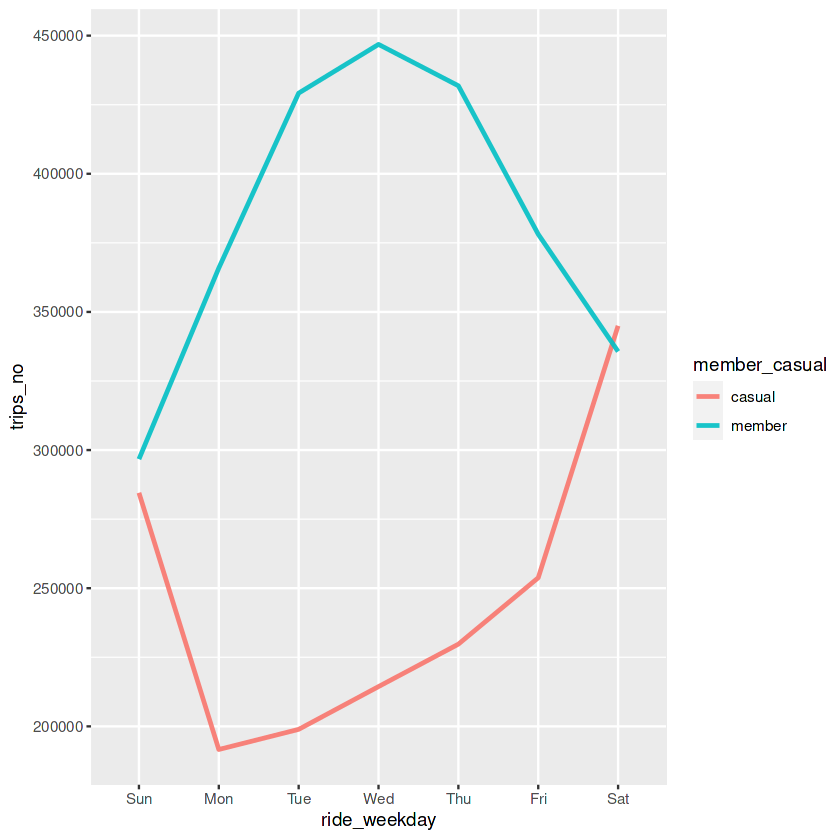

In [13]:
# casual vs member: plot trips for every day in the week
ggplot(data=data, aes(x=ride_weekday, y=trips_no, color=member_casual, group=member_casual)) + 
  geom_line(linewidth=1, alpha=0.9)

In [14]:
# causual vs member: calculate average time spent using services through the year
main_df %>% group_by(member_casual) %>% reframe(avg_time_length_min=mean(ride_time_length_mins)) %>% tibble()

member_casual,avg_time_length_min
<chr>,<dbl>
casual,22.99441
member,12.45765


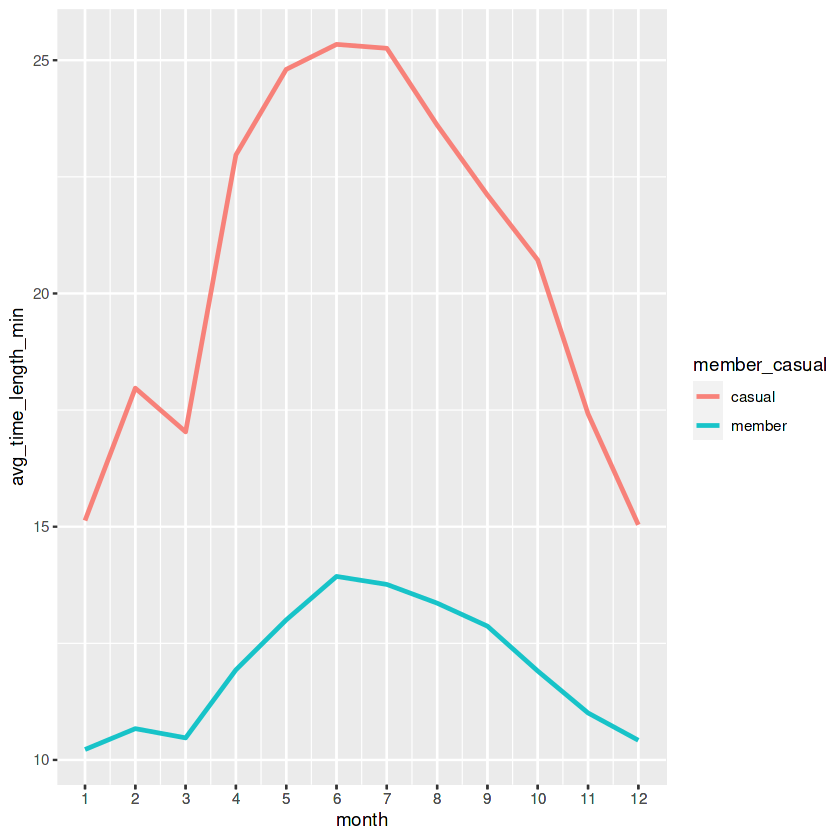

In [15]:
# Add month column
main_df$month <- as.integer(month(ymd_hms(main_df$started_at)))
data <- main_df %>% group_by(month, member_casual) %>% reframe(avg_time_length_min=mean(ride_time_length_mins))

# causual vs member: plot average time spent using services through the year
ggplot(data=data, aes(x=month, y=avg_time_length_min, color=member_casual)) + 
  geom_line(linewidth=1, alpha=0.9) + scale_x_continuous(breaks = data$month)

### 10 most used stations as starting points

In [16]:
# Casual member: Most popular start station
main_df %>% group_by(start_station_name, member_casual) %>% 
count(start_station_name, sort = TRUE, name = "times_used") %>% 
filter(member_casual == "casual") %>%
head(10)

start_station_name,member_casual,times_used
<chr>,<chr>,<int>
Streeter Dr & Grand Ave,casual,51706
DuSable Lake Shore Dr & Monroe St,casual,29460
Michigan Ave & Oak St,casual,22824
Millennium Park,casual,22631
DuSable Lake Shore Dr & North Blvd,casual,21156
Shedd Aquarium,casual,18691
Theater on the Lake,casual,16657
Wells St & Concord Ln,casual,14195
Dusable Harbor,casual,13154


### 10 most used stations as ending points

In [17]:
# Casual member: Most popular end station
main_df %>% group_by(end_station_name, member_casual) %>% 
count(end_station_name, sort = TRUE, name = "times_used") %>% 
filter(member_casual == "casual") %>%
head(10)

end_station_name,member_casual,times_used
<chr>,<chr>,<int>
Streeter Dr & Grand Ave,casual,54994
DuSable Lake Shore Dr & Monroe St,casual,27329
Millennium Park,casual,24733
Michigan Ave & Oak St,casual,24363
DuSable Lake Shore Dr & North Blvd,casual,24173
Theater on the Lake,casual,17964
Shedd Aquarium,casual,16937
Wells St & Concord Ln,casual,13791
Dusable Harbor,casual,12495


* **Why would casual riders buy Cyclistic annual memberships?**


With the few key differences, we have seen earlier between the casual and annual members. The company can convert casual members into annual members if they focus on placing marketing campaigns, offers, gifts, and deals in the right locations and at the right times. From what we have learned, it should target the most used stations by the casual members during the weekend and highly target the summer season. 

In addition, since we have learned that casual members use the services more in terms of time spent, then, the company can place additional charges on casual riders exceeding a certain limit to enforce the subscription option.

* **How can Cyclistic use digital media to influence casual riders to become members?**



Cyclistic can launch marketing campaigns targeting casual riders in the summer, exactly, in the weekends by gifting rides, offering weekend discounts, and deals for new annual subscribers 

# **5. Share**

### Recommendations
* Increase marketing campaigns targetings casual members during the summer season, especially during weekends using:
    1. Digital Marketing by using ride offers, deals, and gifts. For example, gifting rides to new annual subscribers, offering weekend discounts to annual subscribers, etc. 
    2. On the ground marketing targeting the most used stations by the casual riders, also by using ride offers, deals, and gifts to annual members and newly subscribed members.
* Charge additional fees on time spent using the bikeshare services to help increase the number of annaul subscription

##### Charts (Refine the created viz)

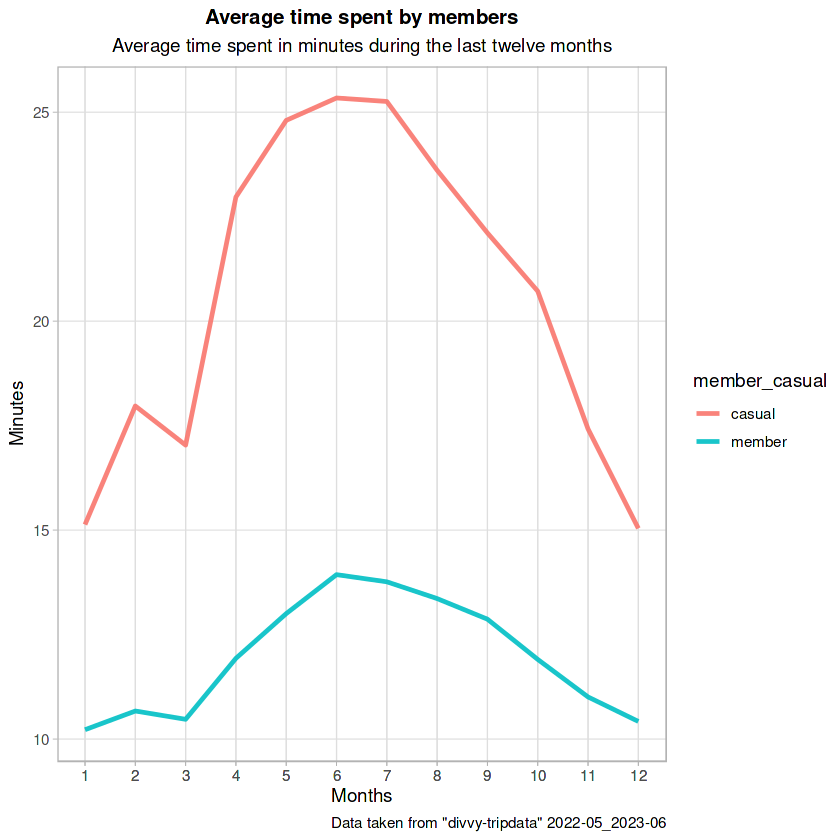

In [18]:
data <- main_df %>% group_by(month, member_casual) %>% reframe(avg_time_length_min=mean(ride_time_length_mins))

# causual vs member: plot average time spent using services through the year
ggplot(data=data, aes(x=month, y=avg_time_length_min, color=member_casual)) + 
geom_line(linewidth=1, alpha=0.9) + 
scale_x_continuous(breaks = data$month) + 
labs(
      title="Average time spent by members", 
      subtitle="Average time spent in minutes during the last twelve months",
      caption="Data taken from \"divvy-tripdata\" 2022-05_2023-06",
) +
xlab("Months") + ylab("Minutes") +
theme_light() + 
theme(
    plot.title = element_text(face = "bold", size = 12, hjust=0.5),
    plot.subtitle = element_text(hjust=0.5),
    axis.ticks = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.minor = element_blank()
)

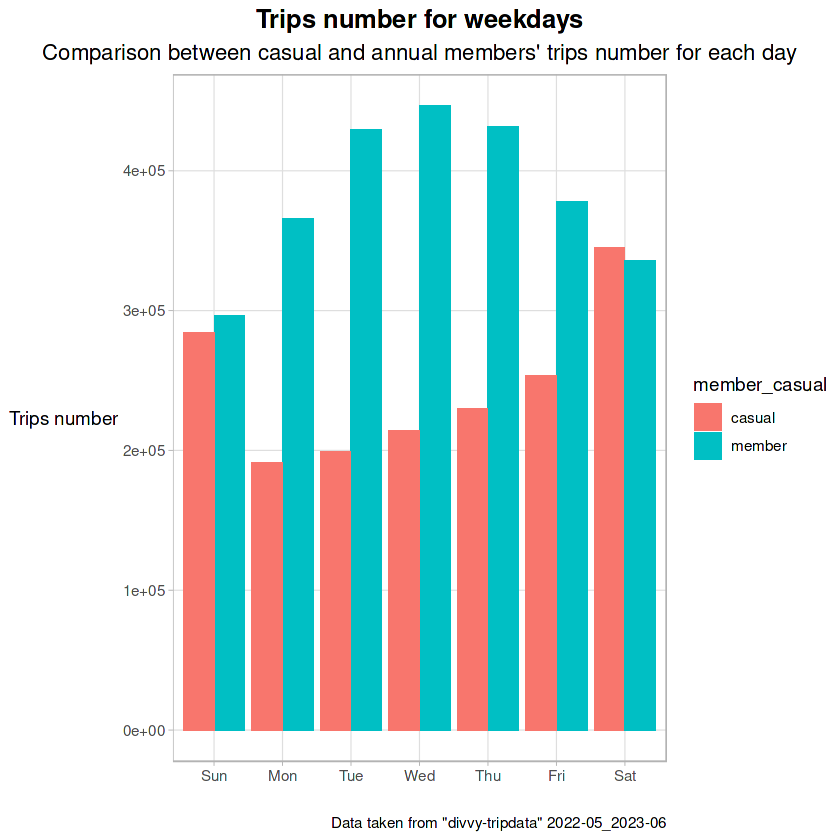

In [19]:
data <- main_df %>% group_by(ride_weekday) %>% count(member_casual, sort=TRUE, name="trips_no")

# casual vs member: plot trips for every day in the week
ggplot(data=data, aes(x=ride_weekday, y=trips_no, fill=member_casual, group=member_casual)) +
geom_bar(stat="identity", position=position_dodge()) +

labs(
      title="Trips number for weekdays", 
      subtitle="Comparison between casual and annual members' trips number for each day",
      caption="Data taken from \"divvy-tripdata\" 2022-05_2023-06",
  ) +
xlab("") + ylab("Trips number") +

theme_light() + 
theme(
    plot.title = element_text(face = "bold", size = 15, hjust=0.5),
    plot.subtitle = element_text(size=13, hjust=0.5),
    axis.ticks = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.minor = element_blank(),
    axis.title.y = element_text(angle = 0, vjust=0.5)
)

options(repr.plot.width=21, repr.plot.height=13)